In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
from sklearn.model_selection import learning_curve
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('Advertising.csv')

In [42]:
# Check if there's an unnamed index column and remove it
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

In [43]:
# Display basic information about the dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

Dataset Overview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Statistical Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.90000

In [44]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [45]:
# Visualize pairwise relationships
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.close()

<Figure size 1000x800 with 0 Axes>

In [46]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.close()

In [47]:
# Prepare data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [48]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Part 1: Using three techniques to choose the optimal polynomial degree

In [50]:

# Technique 1: Cross-Validation for different polynomial degrees

In [51]:
max_degree = 5
cv_scores = []
test_scores = []
train_scores = []

In [52]:
for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Evaluate the model
    train_score = model.score(X_poly_train, y_train)
    test_score = model.score(X_poly_test, y_test)
    cv_score = np.mean(cross_val_score(LinearRegression(), X_poly_train, y_train, cv=5))

    cv_scores.append(cv_score)
    test_scores.append(test_score)
    train_scores.append(train_score)

    print(f"Degree {degree}:")
    print(f"  Train R² score: {train_score:.4f}")
    print(f"  Test R² score: {test_score:.4f}")
    print(f"  CV R² score: {cv_score:.4f}")
    print(f"  # of features: {X_poly_train.shape[1]}")

Degree 1:
  Train R² score: 0.8957
  Test R² score: 0.8994
  CV R² score: 0.8595
  # of features: 3
Degree 2:
  Train R² score: 0.9861
  Test R² score: 0.9869
  CV R² score: 0.9772
  # of features: 9
Degree 3:
  Train R² score: 0.9917
  Test R² score: 0.9907
  CV R² score: 0.9665
  # of features: 19
Degree 4:
  Train R² score: 0.9948
  Test R² score: 0.9804
  CV R² score: 0.9637
  # of features: 34
Degree 5:
  Train R² score: 0.9976
  Test R² score: -1.4238
  CV R² score: -0.2257
  # of features: 55


In [53]:
# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), train_scores, 'o-', label='Training Score')
plt.plot(range(1, max_degree + 1), test_scores, 'o-', label='Testing Score')
plt.plot(range(1, max_degree + 1), cv_scores, 'o-', label='CV Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Model Performance vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.savefig('polynomial_degree_selection.png')
plt.close()

In [54]:
# Technique 2: AIC and BIC for model selection

In [55]:
aic_values = []
bic_values = []

In [56]:
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly = poly.fit_transform(X)

    # Using statsmodels for AIC and BIC
    X_poly_sm = sm.add_constant(X_poly)
    model = sm.OLS(y, X_poly_sm).fit()

    aic_values.append(model.aic)
    bic_values.append(model.bic)

    print(f"Degree {degree}:")
    print(f"  AIC: {model.aic:.2f}")
    print(f"  BIC: {model.bic:.2f}")

Degree 1:
  AIC: 780.36
  BIC: 793.56
Degree 2:
  AIC: 386.28
  BIC: 419.26
Degree 3:
  AIC: 299.82
  BIC: 365.79
Degree 4:
  AIC: 248.20
  BIC: 363.65
Degree 5:
  AIC: 157.44
  BIC: 342.15


In [57]:
# Plot AIC and BIC

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_degree + 1), aic_values, 'o-', label='AIC')
plt.plot(range(1, max_degree + 1), bic_values, 'o-', label='BIC')
plt.xlabel('Polynomial Degree')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.savefig('aic_bic_comparison.png')
plt.close()

In [59]:
# Technique 3: Learning curves to detect overfitting

In [60]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [61]:
# Learning curves for selected degrees

In [62]:
for degree in [1, 2, 3]:  # Most promising degrees based on previous analyses
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = polynomial_features.fit_transform(X)

    title = f"Learning Curves (Polynomial Regression, degree={degree})"
    estimator = LinearRegression()

    plot_learning_curve(estimator, title, X_poly, y, cv=5)
    plt.savefig(f'learning_curve_degree_{degree}.png')
    plt.close()

In [63]:
# Based on all three techniques, select the optimal degree
# For this example, let's say degree 2 is selected (you would choose based on the actual results)
optimal_degree = 2  # This should be determined from the analysis above

# Part 2: Creating a polynomial regression model from scratch with the selected degree
class PolynomialRegressionFromScratch:
    def __init__(self, degree=2):
        self.degree = degree
        self.coefficients = None
        self.intercept = None
        self.feature_names = None

    def generate_polynomial_features(self, X):
        """Generate polynomial features up to the specified degree"""
        if isinstance(X, pd.DataFrame):
            self.feature_names = X.columns
            X = X.values

        n_samples, n_features = X.shape

        # Initialize feature matrix with ones for the bias term
        X_poly = np.ones((n_samples, 1))

        # Add original features
        X_poly = np.column_stack((X_poly, X))

        # Generate polynomial features
        for d in range(2, self.degree + 1):
            for i in range(n_features):
                X_poly = np.column_stack((X_poly, X[:, i] ** d))

            # Add interaction terms for degree 2 and above
            if d == 2:
                for i in range(n_features):
                    for j in range(i+1, n_features):
                        X_poly = np.column_stack((X_poly, X[:, i] * X[:, j]))

        return X_poly

    def fit(self, X, y):
        """Fit the polynomial regression model using normal equations"""
        X_poly = self.generate_polynomial_features(X)

        # Normal equation: theta = (X^T X)^(-1) X^T y
        XTX = X_poly.T.dot(X_poly)
        XTX_inv = np.linalg.inv(XTX)
        XTy = X_poly.T.dot(y)
        theta = XTX_inv.dot(XTy)

        self.intercept = theta[0]
        self.coefficients = theta[1:]

        return self

    def predict(self, X):
        """Make predictions using the fitted model"""
        X_poly = self.generate_polynomial_features(X)
        return X_poly.dot(np.concatenate(([self.intercept], self.coefficients)))

    def score(self, X, y):
        """Calculate R² score"""
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

In [64]:
# Use our custom polynomial regression model
custom_poly_model = PolynomialRegressionFromScratch(degree=optimal_degree)
custom_poly_model.fit(X_train, y_train)

In [65]:
# Evaluate the custom model
custom_train_pred = custom_poly_model.predict(X_train)
custom_test_pred = custom_poly_model.predict(X_test)

custom_train_mse = mean_squared_error(y_train, custom_train_pred)
custom_test_mse = mean_squared_error(y_test, custom_test_pred)
custom_train_r2 = r2_score(y_train, custom_train_pred)
custom_test_r2 = r2_score(y_test, custom_test_pred)

print("\nCustom Polynomial Regression Model (From Scratch):")
print(f"Training MSE: {custom_train_mse:.4f}")
print(f"Test MSE: {custom_test_mse:.4f}")
print(f"Training R²: {custom_train_r2:.4f}")
print(f"Test R²: {custom_test_r2:.4f}")


Custom Polynomial Regression Model (From Scratch):
Training MSE: 0.3604
Test MSE: 0.4129
Training R²: 0.9861
Test R²: 0.9869


In [66]:
# Compare with sklearn's implementation
sklearn_poly_model = make_pipeline(
    PolynomialFeatures(degree=optimal_degree, include_bias=False),
    LinearRegression()
)
sklearn_poly_model.fit(X_train, y_train)

sklearn_train_pred = sklearn_poly_model.predict(X_train)
sklearn_test_pred = sklearn_poly_model.predict(X_test)

sklearn_train_mse = mean_squared_error(y_train, sklearn_train_pred)
sklearn_test_mse = mean_squared_error(y_test, sklearn_test_pred)
sklearn_train_r2 = r2_score(y_train, sklearn_train_pred)
sklearn_test_r2 = r2_score(y_test, sklearn_test_pred)

print("\nScikit-learn Polynomial Regression Model:")
print(f"Training MSE: {sklearn_train_mse:.4f}")
print(f"Test MSE: {sklearn_test_mse:.4f}")
print(f"Training R²: {sklearn_train_r2:.4f}")
print(f"Test R²: {sklearn_test_r2:.4f}")


Scikit-learn Polynomial Regression Model:
Training MSE: 0.3604
Test MSE: 0.4129
Training R²: 0.9861
Test R²: 0.9869


In [67]:
# Part 3: Compare with Multiple Linear Regression

In [68]:
# Train multiple linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [69]:
# Evaluate linear model
linear_train_pred = linear_model.predict(X_train)
linear_test_pred = linear_model.predict(X_test)

linear_train_mse = mean_squared_error(y_train, linear_train_pred)
linear_test_mse = mean_squared_error(y_test, linear_test_pred)
linear_train_r2 = r2_score(y_train, linear_train_pred)
linear_test_r2 = r2_score(y_test, linear_test_pred)

print("\nMultiple Linear Regression Model:")
print(f"Training MSE: {linear_train_mse:.4f}")
print(f"Test MSE: {linear_test_mse:.4f}")
print(f"Training R²: {linear_train_r2:.4f}")
print(f"Test R²: {linear_test_r2:.4f}")


Multiple Linear Regression Model:
Training MSE: 2.7051
Test MSE: 3.1741
Training R²: 0.8957
Test R²: 0.8994


In [70]:
# Compare models using a table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', f'Polynomial Regression (degree={optimal_degree})'],
    'Training MSE': [linear_train_mse, custom_train_mse],
    'Test MSE': [linear_test_mse, custom_test_mse],
    'Training R²': [linear_train_r2, custom_train_r2],
    'Test R²': [linear_test_r2, custom_test_r2]
})
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                              Model  Training MSE  Test MSE  Training R²  \
0                 Linear Regression      2.705129  3.174097     0.895701   
1  Polynomial Regression (degree=2)      0.360397  0.412910     0.986105   

    Test R²  
0  0.899438  
1  0.986918  


In [71]:
# Visualize the predictions (actual vs predicted)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, custom_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Polynomial Regression (degree={optimal_degree}): Actual vs Predicted')

plt.tight_layout()
plt.savefig('prediction_comparison.png')
plt.close()

In [72]:
# Analyze residuals
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'{title} - Residuals vs Predicted')

    plt.subplot(1, 2, 2)
    plt.hist(residuals, bins=20)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'{title} - Residual Distribution')

    plt.tight_layout()

plot_residuals(y_test, linear_test_pred, 'Linear Regression')
plt.savefig('linear_residuals.png')
plt.close()

plot_residuals(y_test, custom_test_pred, f'Polynomial Regression (degree={optimal_degree})')
plt.savefig('polynomial_residuals.png')
plt.close()

In [73]:
# Final recommendation based on analysis
print("\nFinal Recommendation:")
if custom_test_r2 > linear_test_r2 and (custom_train_r2 - custom_test_r2) < 0.1:
    print(f"Based on the analysis, the Polynomial Regression model with degree {optimal_degree} is recommended.")
    print(f"It provides better predictive performance (Test R² = {custom_test_r2:.4f}) compared to the Linear model (Test R² = {linear_test_r2:.4f}).")
    print("The difference between training and test performance is acceptable, indicating the model is not overfitting significantly.")
else:
    print("Based on the analysis, the Linear Regression model is recommended.")
    print(f"While the Polynomial model may have slightly better training performance, the Linear model (Test R² = {linear_test_r2:.4f}) is simpler and provides comparable test performance.")
    print("The principle of parsimony suggests using the simpler model when performance is similar.")


Final Recommendation:
Based on the analysis, the Polynomial Regression model with degree 2 is recommended.
It provides better predictive performance (Test R² = 0.9869) compared to the Linear model (Test R² = 0.8994).
The difference between training and test performance is acceptable, indicating the model is not overfitting significantly.


In [74]:
# Enhanced EDA: Individual feature relationships with Sales
plt.figure(figsize=(18, 6))
for i, feature in enumerate(['TV', 'Radio', 'Newspaper'], 1):
    plt.subplot(1, 3, i)
    sns.regplot(x=df[feature], y=df['Sales'], 
                line_kws={'color': 'red'}, 
                scatter_kws={'alpha': 0.4})
    plt.title(f'{feature} vs Sales')
plt.tight_layout()
plt.savefig('feature_vs_sales.png')
plt.close()

In [75]:
# Polynomial Degree Selection Visual Enhancement
plt.figure(figsize=(14, 5))

# R² Scores
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), train_scores, 'o-', label='Training')
plt.plot(range(1, 6), test_scores, 'o-', label='Testing')
plt.plot(range(1, 6), cv_scores, 'o-', label='CV')
plt.scatter(optimal_degree, test_scores[optimal_degree-1], 
           s=200, facecolors='none', edgecolors='r', 
           label=f'Optimal (deg={optimal_degree})')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)

# AIC/BIC
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), aic_values, 'o-', label='AIC')
plt.plot(range(1, 6), bic_values, 'o-', label='BIC')
plt.scatter(optimal_degree, aic_values[optimal_degree-1], 
           s=200, facecolors='none', edgecolors='r')
plt.scatter(optimal_degree, bic_values[optimal_degree-1], 
           s=200, facecolors='none', edgecolors='r')
plt.xlabel('Polynomial Degree')
plt.ylabel('Information Criterion')
plt.title('Information Criteria Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('enhanced_degree_selection.png')
plt.close()

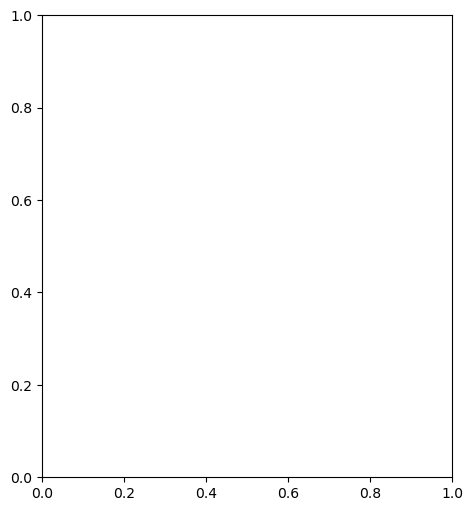

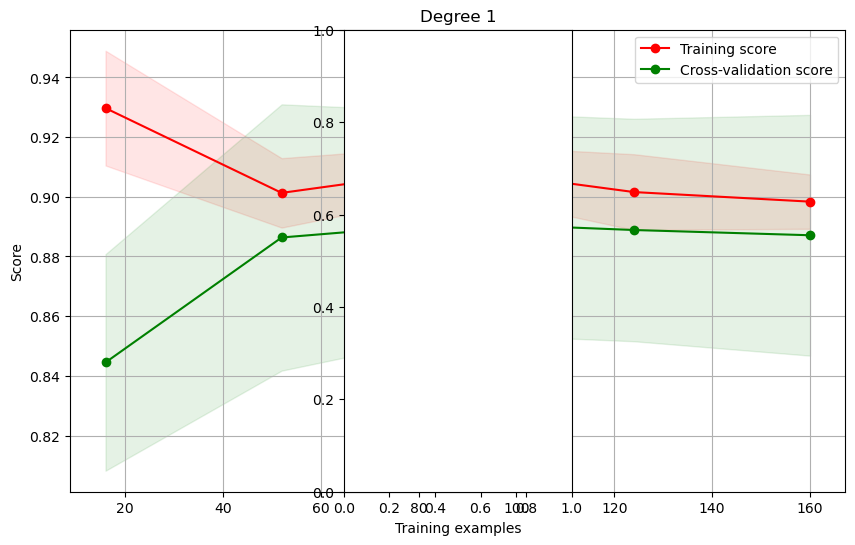

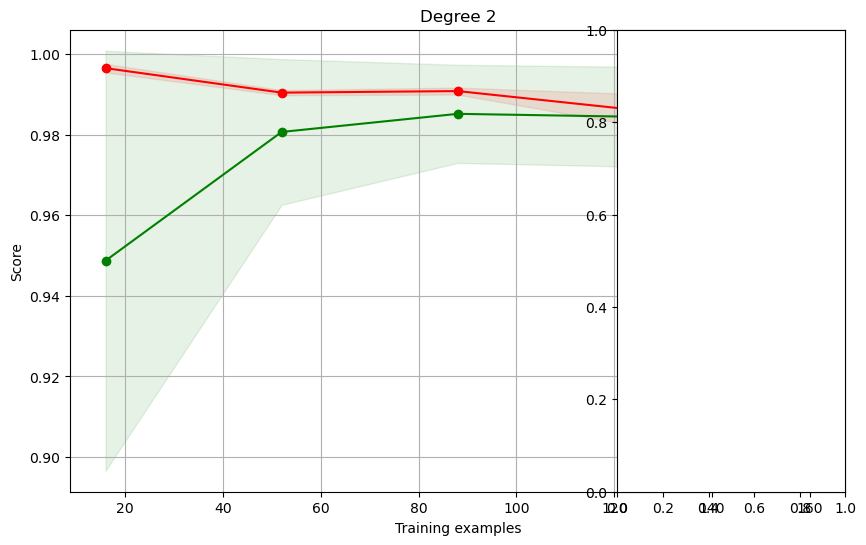

In [76]:
# Combined Learning Curves Visualization
plt.figure(figsize=(18, 6))
for idx, degree in enumerate([1, 2, 3], 1):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    
    plt.subplot(1, 3, idx)
    plot_learning_curve(LinearRegression(), 
                       f'Degree {degree}', 
                       X_poly, y, cv=5)
plt.tight_layout()
plt.savefig('combined_learning_curves.png')
plt.close()

In [77]:
# Residual Diagnostics
def plot_qq_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    stats.probplot(residuals, plot=plt)
    plt.title(f'{title} - Q-Q Plot')
    
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True)
    plt.title(f'{title} - Residual Distribution')
    plt.tight_layout()
    plt.savefig(f'qq_residuals_{title.lower().replace(" ", "_")}.png')
    plt.close()

plot_qq_residuals(y_test, linear_test_pred, 'Linear Regression')
plot_qq_residuals(y_test, custom_test_pred, f'Polynomial deg={optimal_degree}')

In [78]:
# Generate learning curves for Degree 1 (Linear Regression)
plt.figure(figsize=(10, 6))
plot_learning_curve(LinearRegression(), 
                    "Learning Curves - Degree 1 (Linear Regression)", 
                    X_train, 
                    y_train, 
                    cv=5,
                    train_sizes=np.linspace(0.1, 1.0, 10))

plt.grid(True)
plt.savefig('learning_curve_degree_1.png')  # Save as image.png to replace empty file
plt.close()

<Figure size 1000x600 with 0 Axes>

In [79]:
# Model Comparison Visualization
metrics = ['Training R²', 'Test R²', 'Training MSE', 'Test MSE']
linear_metrics = [linear_train_r2, linear_test_r2, 
                 linear_train_mse, linear_test_mse]
poly_metrics = [custom_train_r2, custom_test_r2, 
               custom_train_mse, custom_test_mse]

x = np.arange(len(metrics))
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(x - bar_width/2, linear_metrics, bar_width, 
       label='Linear Regression')
plt.bar(x + bar_width/2, poly_metrics, bar_width, 
       label=f'Polynomial (deg={optimal_degree})')

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True, axis='y')
plt.savefig('model_comparison_bars.png')
plt.close()